# 日期和时间
## C.1 Python
Python标准库中的**datetime**模块实现了最重要的日期和时间相关任务。

In [1]:
import datetime as dt

In [2]:
dt.datetime.now()

datetime.datetime(2017, 12, 10, 17, 4, 14, 2000)

In [5]:
to = dt.datetime.today()
to

datetime.datetime(2017, 12, 10, 17, 4, 59, 959000)

In [6]:
type(to)

datetime.datetime

In [7]:
dt.datetime.today().weekday()
  # 0 = Monday

6

In [8]:
d = dt.datetime(2016,10,31,10,5,30,500000)
d

datetime.datetime(2016, 10, 31, 10, 5, 30, 500000)

In [9]:
print d

2016-10-31 10:05:30.500000


In [10]:
str(d)

'2016-10-31 10:05:30.500000'

In [11]:
d.year

2016

In [13]:
d.month

10

In [14]:
d.day

31

In [15]:
d.hour

10

In [16]:
o = d.toordinal()  # 将日期信息转换为序数表示
o

736268

In [17]:
dt.datetime.fromordinal(o)  # 在此过程中丢失了时间信息

datetime.datetime(2016, 10, 31, 0, 0)

In [18]:
t = dt.datetime.time(d)
t

datetime.time(10, 5, 30, 500000)

In [19]:
type(t)

datetime.time

In [21]:
dd = dt.datetime.date(d)
dd

datetime.date(2016, 10, 31)

In [23]:
d.replace(second=0,microsecond=0)  # 简单地用字面量代替datetime对象某些属性

datetime.datetime(2016, 10, 31, 10, 5)

In [24]:
td = dt.datetime.now()-d
td

datetime.timedelta(405, 25794, 508000)

In [26]:
type(td)

datetime.timedelta

In [28]:
td.days

405

In [29]:
td.seconds

25794

In [30]:
td.microseconds

508000

In [32]:
d.isoformat()

'2016-10-31T10:05:30.500000'

In [33]:
d.strftime("%A,%d.%B %Y %I:%M%p")

'Monday,31.October 2016 10:05AM'

In [34]:
dt.datetime.strptime('2017-03-31','%Y-%m-%d')

datetime.datetime(2017, 3, 31, 0, 0)

In [35]:
dt.datetime.strptime('30-4-16','%d-%m-%y')

datetime.datetime(2016, 4, 30, 0, 0)

In [36]:
ds = str(d)
ds

'2016-10-31 10:05:30.500000'

In [45]:
dt.datetime.strptime(ds,'%Y-%m-%d %H:%M:%S.%f')

datetime.datetime(2016, 10, 31, 10, 5, 30, 500000)

In [46]:
dt.datetime.now()

datetime.datetime(2017, 12, 10, 17, 25, 52, 219000)

In [47]:
dt.datetime.utcnow()  # UTC世界调整时间，即格林威治标准时间GMT

datetime.datetime(2017, 12, 10, 9, 26, 1, 554000)

In [48]:
dt.datetime.now() - dt.datetime.utcnow()

datetime.timedelta(0, 28800)

In [53]:
  # UTC时间的定义采用如下形式：
class UTC(dt.tzinfo):
    def utcoffset(self,d):
        return dt.timedelta(hours=0)
    def dst(self,d):
        return dt.timedelta(hours=0)
    def tzname(self,d):
        return "UTC"

In [54]:
u = dt.datetime.utcnow()
u = u.replace(tzinfo=UTC())
u

datetime.datetime(2017, 12, 10, 9, 35, 18, 500000, tzinfo=<__main__.UTC object at 0x000000000880B240>)

In [55]:
  # 在夏季CET有如下定义：
class CET(dt.tzinfo):
    def utcoffset(self,d):
        return dt.timedelta(hours=2)
    def dst(self,d):
        return dt.timedelta(hours=1)
    def tzname(self,d):
        return "CET + 1"

In [56]:
u.astimezone(CET())  # 将基于UTC的datetime对象u转换为基于CET的对象

datetime.datetime(2017, 12, 10, 11, 35, 18, 500000, tzinfo=<__main__.CET object at 0x000000000880B128>)

Python模块pytz实现全世界最重要的时区：

In [57]:
import pytz  # 实现全世界最重要的时区
pytz.country_names['US']

u'United States'

In [59]:
pytz.country_timezones['BE']

[u'Europe/Brussels']

In [60]:
pytz.common_timezones[-10:]

['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [61]:
  # 有了pytz，通常没必要定义自己的tzinfo对象：
u = dt.datetime.utcnow()
u = u.replace(tzinfo=pytz.utc)
u

datetime.datetime(2017, 12, 10, 9, 42, 14, 56000, tzinfo=<UTC>)

In [63]:
u.astimezone(pytz.timezone("CET")) 

datetime.datetime(2017, 12, 10, 10, 42, 14, 56000, tzinfo=<DstTzInfo 'CET' CET+1:00:00 STD>)

In [64]:
u.astimezone(pytz.timezone("GMT")) 

datetime.datetime(2017, 12, 10, 9, 42, 14, 56000, tzinfo=<StaticTzInfo 'GMT'>)

In [69]:
u.astimezone(pytz.timezone("US/Central")) 

datetime.datetime(2017, 12, 10, 3, 42, 14, 56000, tzinfo=<DstTzInfo 'US/Central' CST-1 day, 18:00:00 STD>)

## C.2 NumPy
NumPy 1.7起有了原生的日期-时间信息支持，基本类称为**datetime64**：

In [72]:
import numpy as np
nd = np.datetime64('2015-10-31')
nd

numpy.datetime64('2015-10-31')

In [74]:
np.datetime_as_string(nd)

'2015-10-31'

In [75]:
np.datetime_data(nd)  # 保存频率信息（例如D表示天）和单位（1表示一天）

('D', 1)

In [76]:
d

datetime.datetime(2016, 10, 31, 10, 5, 30, 500000)

In [78]:
nd = np.datetime64(d)
nd

numpy.datetime64('2016-10-31T10:05:30.500000')

In [79]:
nd.astype(dt.datetime)

datetime.datetime(2016, 10, 31, 10, 5, 30, 500000)

In [80]:
nd = np.datetime64('2015-10','D')
nd

numpy.datetime64('2015-10-01')

In [81]:
np.datetime64('2015-10') == np.datetime64('2015-10-01')

True

In [82]:
np.array(['2016-06-10','2016-07-10','2017-08-10'],dtype='datetime64')

array(['2016-06-10', '2016-07-10', '2017-08-10'], dtype='datetime64[D]')

In [83]:
np.array(['2016-06-10T12:00:00','2016-07-10T12:00:00',
         '2016-08-10T12:00:00'],dtype='datetime64[s]')

array(['2016-06-10T12:00:00', '2016-07-10T12:00:00', '2016-08-10T12:00:00'], dtype='datetime64[s]')

In [84]:
np.arange('2016-01-01','2016-01-04',dtype='datetime64')

array(['2016-01-01', '2016-01-02', '2016-01-03'], dtype='datetime64[D]')

In [85]:
np.arange('2016-01-01','2016-10-01',dtype='datetime64[M]')

array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09'], dtype='datetime64[M]')

In [87]:
np.arange('2016-01-01','2016-10-01',dtype='datetime64[W]')[:10]

array(['2015-12-31', '2016-01-07', '2016-01-14', '2016-01-21',
       '2016-01-28', '2016-02-04', '2016-02-11', '2016-02-18',
       '2016-02-25', '2016-03-03'], dtype='datetime64[W]')

In [96]:
dtl = np.arange('2016-01-01T00:00:00','2016-01-02T00:00:00',dtype='datetime64[h]')
dtl[:10]

array(['2016-01-01T00', '2016-01-01T01', '2016-01-01T02', '2016-01-01T03',
       '2016-01-01T04', '2016-01-01T05', '2016-01-01T06', '2016-01-01T07',
       '2016-01-01T08', '2016-01-01T09'], dtype='datetime64[h]')

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
np.random.seed(3000)
rnd = np.random.standard_normal(len(dtl)).cumsum()**2

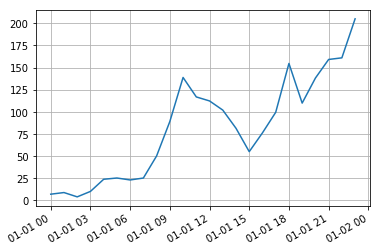

In [93]:
fig = plt.figure()
plt.plot(dtl.astype(dt.datetime),rnd)
plt.grid(True)
fig.autofmt_xdate()

In [95]:
np.arange('2016-01-01T00:00:00','2016-01-02T00:00:00',dtype='datetime64[s]')[:10]

array(['2016-01-01T00:00:00', '2016-01-01T00:00:01', '2016-01-01T00:00:02',
       '2016-01-01T00:00:03', '2016-01-01T00:00:04', '2016-01-01T00:00:05',
       '2016-01-01T00:00:06', '2016-01-01T00:00:07', '2016-01-01T00:00:08',
       '2016-01-01T00:00:09'], dtype='datetime64[s]')

In [97]:
np.arange('2016-01-01T00:00:00','2016-01-02T00:00:00',dtype='datetime64[ms]')[:10]

array(['2016-01-01T00:00:00.000', '2016-01-01T00:00:00.001',
       '2016-01-01T00:00:00.002', '2016-01-01T00:00:00.003',
       '2016-01-01T00:00:00.004', '2016-01-01T00:00:00.005',
       '2016-01-01T00:00:00.006', '2016-01-01T00:00:00.007',
       '2016-01-01T00:00:00.008', '2016-01-01T00:00:00.009'], dtype='datetime64[ms]')

## C.3 pandas
**pandas**库在设计中专门考虑了时间序列数据。因此，该库提供了可以高效处理日期-时间信息的类，如用于时间索引的DatetimeIndex类。

In [98]:
import pandas as pd
ts = pd.Timestamp('2016-06-30')
ts

Timestamp('2016-06-30 00:00:00')

In [100]:
d = ts.to_pydatetime()
d

datetime.datetime(2016, 6, 30, 0, 0)

In [101]:
pd.Timestamp(d)

Timestamp('2016-06-30 00:00:00')

In [102]:
pd.Timestamp(nd)

Timestamp('2015-10-01 00:00:00')

In [104]:
dti = pd.date_range('2016/01/01',freq='M',periods=12)
dti

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [105]:
dti[6]

Timestamp('2016-07-31 00:00:00', freq='M')

In [106]:
pdi = dti.to_pydatetime()
pdi

array([datetime.datetime(2016, 1, 31, 0, 0),
       datetime.datetime(2016, 2, 29, 0, 0),
       datetime.datetime(2016, 3, 31, 0, 0),
       datetime.datetime(2016, 4, 30, 0, 0),
       datetime.datetime(2016, 5, 31, 0, 0),
       datetime.datetime(2016, 6, 30, 0, 0),
       datetime.datetime(2016, 7, 31, 0, 0),
       datetime.datetime(2016, 8, 31, 0, 0),
       datetime.datetime(2016, 9, 30, 0, 0),
       datetime.datetime(2016, 10, 31, 0, 0),
       datetime.datetime(2016, 11, 30, 0, 0),
       datetime.datetime(2016, 12, 31, 0, 0)], dtype=object)

In [107]:
pd.DatetimeIndex(pdi)  # 使用DatetimeIndex构造器可以进行反向操作

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq=None)

In [109]:
pd.DatetimeIndex(dtl.astype(pd.datetime))  # 对于Numpy datetime64对象，必须使用astype方法

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               '2016-01-01 10:00:00', '2016-01-01 11:00:00',
               '2016-01-01 12:00:00', '2016-01-01 13:00:00',
               '2016-01-01 14:00:00', '2016-01-01 15:00:00',
               '2016-01-01 16:00:00', '2016-01-01 17:00:00',
               '2016-01-01 18:00:00', '2016-01-01 19:00:00',
               '2016-01-01 20:00:00', '2016-01-01 21:00:00',
               '2016-01-01 22:00:00', '2016-01-01 23:00:00'],
              dtype='datetime64[ns]', freq=None)

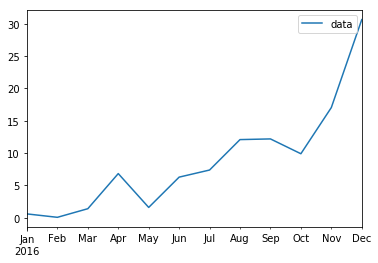

In [111]:
rnd = np.random.standard_normal(len(dti)).cumsum()**2
df = pd.DataFrame(rnd,columns=['data'],index=dti)
df.plot()

In [112]:
  # pandas还很好地与pytz模块集成，管理时区：
pd.date_range('2016/01/01',freq='M',periods=12,
             tz=pytz.timezone('CET'))

DatetimeIndex(['2016-01-31 00:00:00+01:00', '2016-02-29 00:00:00+01:00',
               '2016-03-31 00:00:00+02:00', '2016-04-30 00:00:00+02:00',
               '2016-05-31 00:00:00+02:00', '2016-06-30 00:00:00+02:00',
               '2016-07-31 00:00:00+02:00', '2016-08-31 00:00:00+02:00',
               '2016-09-30 00:00:00+02:00', '2016-10-31 00:00:00+01:00',
               '2016-11-30 00:00:00+01:00', '2016-12-31 00:00:00+01:00'],
              dtype='datetime64[ns, CET]', freq='M')

In [114]:
dti = pd.date_range('2016/01/01',freq='M',periods=12,tz='US/Eastern')
dti

DatetimeIndex(['2016-01-31 00:00:00-05:00', '2016-02-29 00:00:00-05:00',
               '2016-03-31 00:00:00-04:00', '2016-04-30 00:00:00-04:00',
               '2016-05-31 00:00:00-04:00', '2016-06-30 00:00:00-04:00',
               '2016-07-31 00:00:00-04:00', '2016-08-31 00:00:00-04:00',
               '2016-09-30 00:00:00-04:00', '2016-10-31 00:00:00-04:00',
               '2016-11-30 00:00:00-05:00', '2016-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', freq='M')

In [115]:
  # 时区转换
dti.tz_convert('GMT')

DatetimeIndex(['2016-01-31 05:00:00+00:00', '2016-02-29 05:00:00+00:00',
               '2016-03-31 04:00:00+00:00', '2016-04-30 04:00:00+00:00',
               '2016-05-31 04:00:00+00:00', '2016-06-30 04:00:00+00:00',
               '2016-07-31 04:00:00+00:00', '2016-08-31 04:00:00+00:00',
               '2016-09-30 04:00:00+00:00', '2016-10-31 04:00:00+00:00',
               '2016-11-30 05:00:00+00:00', '2016-12-31 05:00:00+00:00'],
              dtype='datetime64[ns, GMT]', freq='M')